In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression

# Первый файл

In [ ]:
x1 = pd.read_csv("1.txt", header = None)
x1

,0,1
0,5.000000,4.251064
1,5.202020,4.699749
2,5.404040,5.185734
3,5.606061,6.467579
4,5.808081,5.000453
...,...,...
95,24.191919,17.011363
96,24.393939,16.352483
97,24.595960,18.075133
98,24.797980,17.484464


In [ ]:
x = x1[0]
y = x1[1]

In [ ]:
def pirson(x, y):
    n = x.size
    x_mean = np.sum(x) / n
    y_mean = np.sum(y) / n
    xy_mean = 1/n*np.sum(x*y)
    s_x = np.sqrt(1/n * np.sum(x**2) - x_mean**2)
    s_y = np.sqrt(1/n * np.sum(y**2) - y_mean**2)
    r = (xy_mean - x_mean * y_mean) / (s_x * s_y)
    return r

In [ ]:
def linear_regression(x, y):
    n = x.size
    x_mean = np.sum(x) / n
    y_mean = np.sum(y) / n
    std_x = np.sqrt(1/(n - 1) * ((x - x_mean)**2).sum())
    std_y = np.sqrt(1/(n - 1) * ((y - y_mean)**2).sum())
    r = pirson(x, y)
    a = r * std_y/std_x
    b = np.sum(y)/n-r*std_y/std_x*np.sum(x)/n
    y_pred = a * x + b

    return a, b, y_pred

In [ ]:
r = pirson(x, y)
print(r)
if r >= 0.1 and r < 0.3:
        print('слабая')
elif r >= 0.3 and r < 0.5:
    print('умеренная')
elif r >= 0.5 and r < 0.7:
    print('заметная')
elif r >= 0.7 and r < 0.9:
    print('высокая')
elif r >= 0.9 and r < 1:
    print('весьма высокая')

t = r * np.sqrt((x.size - 2)/(1 - r**2))
crt = scipy.stats.t.ppf(1-0.05/2, x.size - 2)
print('t = ', t)
print('crt = ', crt)

0.9859778697035992
весьма высокая
t =  58.49059019646496
crt =  1.984467454426692


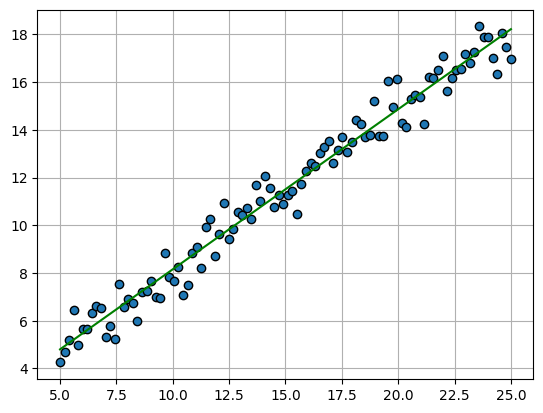

In [ ]:
a, b, y_pred = linear_regression(x, y)
plt.plot(x, y, 'o', mec = 'black')
plt.plot(x, y_pred, 'g')
plt.grid()

In [ ]:
def fisher(x, y):
    n = x.size
    x_mean = np.sum(x) / n
    y_mean = np.sum(y) / n
    Smod2 = np.sum((y - y_pred)**2)/(n - 2)
    So2 = np.sum((y - y_mean)**2)/(n - 1)
    Sm2 = min(Smod2, So2)
    Sb2 = max(Smod2, So2)

    f = Sb2 / Sm2
    crf = scipy.stats.f.ppf(0.95, n-2, n-1)
    print('f =', f)
    print('crf =', crf)
    if f > crf:
        print("H1: Модель адекватна. Дисперсии не равны")
    else:
        print("H0: Модель не адекватна. Дисперсии равны")

In [ ]:
def get_m(x, y):
    n = x.size
    x_mean = np.sum(x) / n
    y_mean = np.sum(y) / n
    std_x = np.sqrt(1/(n - 1) * ((x - x_mean)**2).sum())
    Smod2 = np.sum((y - y_pred)**2)/(n - 2)
    Smod = np.sqrt(Smod2)
    m_a = Smod /(std_x*np.sqrt(n))
    m_b = Smod*np.sqrt(np.sum(x**2))/(std_x*n)

    return m_a, m_b

In [ ]:
def t_rasp(m_a, m_b):
    n = x.size
    T_a = a / m_a
    T_b = b / m_b
    crt = scipy.stats.t.ppf(1 - 0.05/2, n - 2)
    print('T_a =', T_a)
    print('T_b =', T_b)
    print('crt =', crt)
    if T_a > crt and T_b > crt:
        print('Параметр значимый')
    else:
        print('Параметр не значимый')

In [ ]:
fisher(x, y)

f = 35.546961025556286
crf = 1.395025696640278
H1: Модель адекватна. Дисперсии не равны


In [ ]:
m_a, m_b = get_m(x, y)

In [ ]:
m_a

0.011411655063820364

In [ ]:
m_b

0.18365559508890286

In [ ]:
t_rasp(m_a, m_b)

T_a = 58.785254984270935
T_b = 7.874659897896178
crt = 1.984467454426692
Параметр значимый


In [ ]:
a_left = a - crt * m_a
a_right = a + crt * m_a

b_left = b - crt * m_b
b_right = b + crt * m_b

print(a_left)
print(a_right)
print(b_left)
print(b_right)

0.6481909946439316
0.6934831107945217
1.0817667983935473
1.8106839009481361


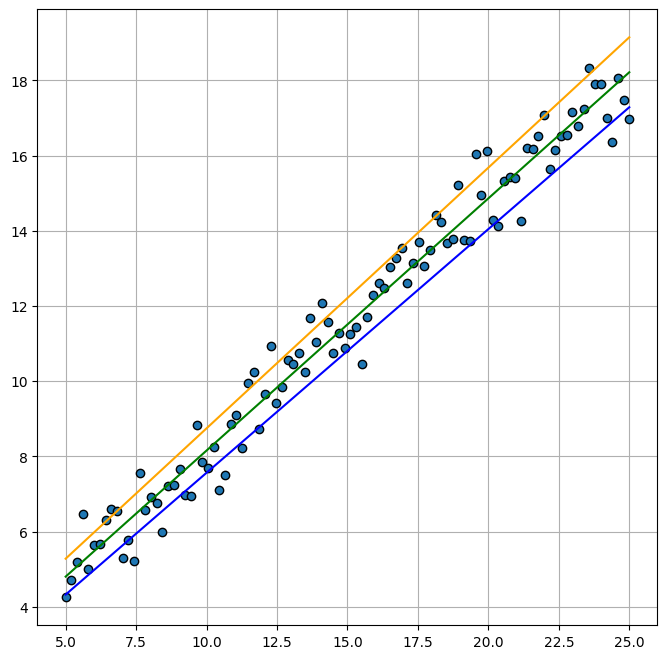

In [ ]:
plt.figure(figsize=(8,8))
plt.grid()
plt.plot(x, y, 'o', mec = 'black')
plt.plot(x, a*x+b, 'g')

plt.plot(x,  x * a_left + b_left, 'blue')
plt.plot(x, x * a_right + b_right, 'orange')

In [ ]:
n = x.size
Smod = np.sqrt(np.sum((y - y_pred)**2)/(n - 2))
x_mean = np.sum(x) / n
std_x = np.sqrt(1/(n - 1) * ((x - x_mean)**2).sum())
E = crt * Smod * np.sqrt(1 + 1/n + (28-x_mean)**2/(n*std_x**2))
E

1.3659860963923436

In [ ]:
y_pred_min = a*28+b - E
y_pred_max = a*28+b + E
print([y_pred_min, y_pred_max])

[18.86367672941684, 21.59564892220153]


# Второй файл

In [ ]:
x2 = pd.read_csv("2.txt", header = None, names = ['x', 'd1', 'd2', 'y'])

In [ ]:
x2

,x,d1,d2,y
0,15.101010,0.0,1.0,-5.474276
1,5.404040,1.0,0.0,-0.595847
2,8.030303,1.0,0.0,-1.490844
3,14.696970,1.0,1.0,-2.820818
4,5.606061,1.0,0.0,-0.439753
...,...,...,...,...
195,11.464646,0.0,0.0,-4.610556
196,11.666667,0.0,0.0,-5.328026
197,11.868687,1.0,0.0,-2.272656
198,23.383838,0.0,1.0,-10.162460


In [ ]:
def chou(x2, x_1, x_2):
    a, b, y_pred = linear_regression(x2['x'], x2['y'])
    rss =  np.sum((x2['y'] - y_pred)**2)

    a1, b1, y_pred = linear_regression(x_1['x'], x_1['y'])
    rss1 = np.sum((x_1['y'] - y_pred)**2)
    print('a1 = ', a1)
    print('b1 = ', b1)

    plt.figure(figsize=(5,5))
    plt.plot(x_1['x'], x_1['y'], 'o', mec = 'black')
    plt.plot(x_1['x'], y_pred, 'g')

    a2, b2, y_pred = linear_regression(x_2['x'], x_2['y'])
    rss2 = np.sum((x_2['y'] - y_pred)**2)
    print('a2 = ', a2)
    print('b2 = ', b2)

    plt.figure(figsize=(5,5))
    plt.plot(x_2['x'], x_2['y'], 'o', mec = 'black')
    plt.plot(x_2['x'], y_pred, 'g')

    k = 2
    f = (rss-rss1-rss2)/k/((rss1+rss2)/(x2.size-2*k))
    crf = scipy.stats.f.ppf(0.95, k, x2.size-2*k)
    print('rss=', rss)
    print('rss1=', rss1)
    print('rss2=', rss2)
    print(f, '>', crf)
    print(a1, '=', a2)
    print(b1, '=', b2)

In [ ]:
x_1 = x2[x2['d1'] == 0][['x', 'y']]
x_2 = x2[x2['d1'] == 1][['x', 'y']]

a1 =  -0.42017548135088667
b1 =  -0.015548416694265654
a2 =  -0.2972760859370394
b2 =  1.2033364345980266
rss= 520.0809892058327
rss1= 17.553097517690222
rss2= 7.938290047868738
7722.084996219884 > 3.007035000922952
-0.42017548135088667 = -0.2972760859370394
-0.015548416694265654 = 1.2033364345980266


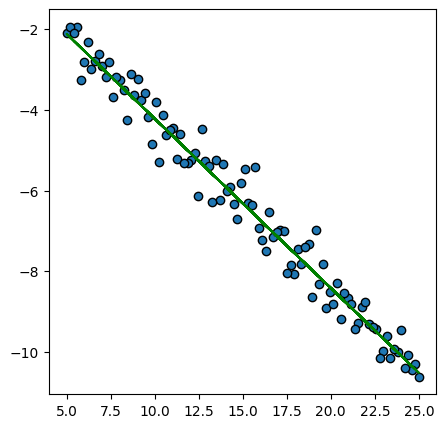

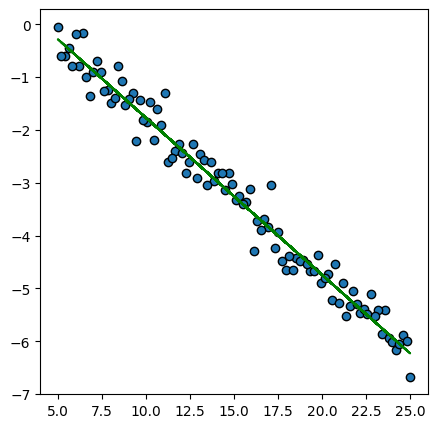

In [ ]:
chou(x2, x_1, x_2)

In [ ]:
x_1 = x2[x2['d2'] == 0][['x', 'y']]
x_2 = x2[x2['d2'] == 1][['x', 'y']]

a1 =  -0.35642758913105477
b1 =  0.6912540990454152
a2 =  -0.3593895601256322
b2 =  0.46178576998481624
rss= 520.0809892058327
rss1= 257.77657547859855
rss2= 258.5482701083944
2.8953577831387696 > 3.007035000922952
-0.35642758913105477 = -0.3593895601256322
0.6912540990454152 = 0.46178576998481624


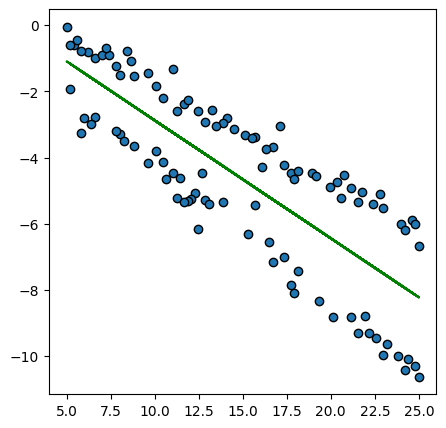

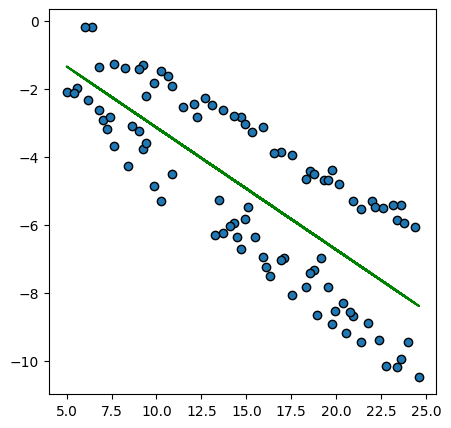

In [ ]:
chou(x2, x_1, x_2)

# Третий файл

In [ ]:
x3 = pd.read_csv("3.txt", header = None, names = ['x', 'y'])

In [ ]:
x3

,x,y
0,5.000000,5.218939
1,5.202020,1.227842
2,5.404040,0.023294
3,5.606061,-3.737039
4,5.808081,6.834162
...,...,...
95,24.191919,1.502148
96,24.393939,18.677574
97,24.595960,2.062174
98,24.797980,-38.527584


In [ ]:
x = x3['x']
y = x3['y']

a= -0.3590132141100319
b= 3.196280260260097


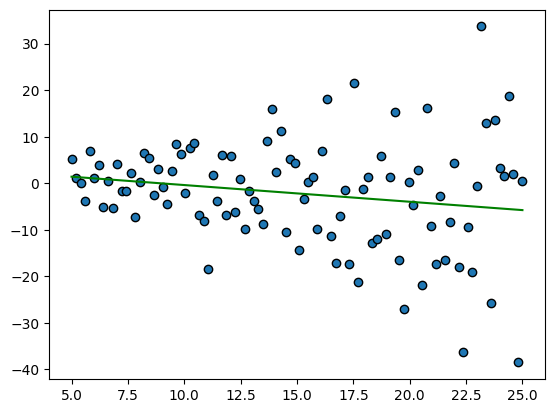

In [ ]:
a, b, y_pred = linear_regression(x, y)
print('a=', a)
print('b=', b)

plt.plot(x, y, 'o', mec = 'black')
plt.plot(x, y_pred, 'g')

In [ ]:
fisher(x, y)

f = 1.0235661857669656
crf = 1.395025696640278
H0: Модель не адекватна. Дисперсии равны


In [ ]:
m_a, m_b = get_m(x, y)
t_rasp(m_a, m_b)

T_a = -1.834862280062877
T_b = 1.0150381462796512
crt = 1.984467454426692
Параметр не значимый


In [ ]:
# Тест Спирмена
e = np.abs(y - y_pred)
x3['x_rank'] = x3['x'].rank()
x3['e_rank'] = e.rank()

spearman = 1 - 6*np.sum((x3['e_rank'] - x3['x_rank'])**2)/(x.size*(x.size**2-1))
spearman

0.5346414641464147

In [ ]:
t_statistic = spearman*np.sqrt(x.size - 2)/np.sqrt(1-spearman**2)
t_statistic
crt = scipy.stats.t.ppf(1 - 0.05/2, x.size - 2)
print(t_statistic,'>',crt)
if t_statistic > crt:
    print('Гетероскедастичность присутствует')
else:
    print('Гетероскедастичность в данных нет')

6.2629417007855315 > 1.984467454426692
Гетероскедастичность присутствует


In [ ]:
from scipy.stats import spearmanr
spearmanr(x3['x_rank'], x3['e_rank'])

SignificanceResult(statistic=0.5346414641464146, pvalue=1.0065526452519582e-08)

In [ ]:
# Тест Гольдфельда-Квандта

x3 = pd.read_csv("3.txt", header = None, names = ['x', 'y'])
x3 = x3.sort_values(by = 'x', ascending=False)
x3

,x,y
99,25.000000,0.542887
98,24.797980,-38.527584
97,24.595960,2.062174
96,24.393939,18.677574
95,24.191919,1.502148
...,...,...
4,5.808081,6.834162
3,5.606061,-3.737039
2,5.404040,0.023294
1,5.202020,1.227842


In [ ]:
n = x3['x'].size
m = min(int(np.round(3/8*n)), int(np.round(n/2)))
x3 = x3.reset_index(drop=True)
x3

,x,y
0,25.000000,0.542887
1,24.797980,-38.527584
2,24.595960,2.062174
3,24.393939,18.677574
4,24.191919,1.502148
...,...,...
95,5.808081,6.834162
96,5.606061,-3.737039
97,5.404040,0.023294
98,5.202020,1.227842


In [ ]:
m

38

In [ ]:
x = x3['x']
y = x3['y']
a, b, y_pred_1 = linear_regression(x.head(m), y.head(m))
a, b, y_pred_2 = linear_regression(x.tail(m), y.tail(m))

In [ ]:
f = (np.sum((y_pred_1-y[:m])**2)/(m-1))/(np.sum((y_pred_2 - y[n-m:])**2)/(m-1))
f

7.86218714581711

In [ ]:
crf = scipy.stats.f.ppf(0.95, m-1, m-1)
crf

1.7295070322048738

In [ ]:
if f > crf:
    print('Гетероскедастичность присутствует')
else:
    print('Гетероскедастичность в данных нет')

Гетероскедастичность присутствует
